# FLISoL/Bagé 2023      
Notebook da palestra "Python para finanças: explorando dados financeiros!".         
Link de acesso: [https://www.youtube.com/watch?v=j1sINO0WoGY](https://www.youtube.com/watch?v=j1sINO0WoGY)


## Bibliotecas usadas na área financeira

In [1]:
# Exemplo: Bibliotecas Python usadas na área financeira - pandas

import pandas as pd

url = 'https://raw.githubusercontent.com/apusdigital/flisol-2023/main/datasets/AAPL.csv'

# Carrega os dados do arquivo CSV
df = pd.read_csv(url, index_col = 'Date', parse_dates = True)

# Calcula os retornos diários
df['Return'] = df['Close'].pct_change()

# Calcula o retorno diário médio
daily_return_mean = df['Return'].mean()
print('Retorno diário médio:', daily_return_mean)

# Calcula a volatilidade histórica
daily_volatility = df['Return'].std()
print('Volatilidade histórica:', daily_volatility)

Retorno diário médio: -0.004700511517994327
Volatilidade histórica: 0.012989624617195269


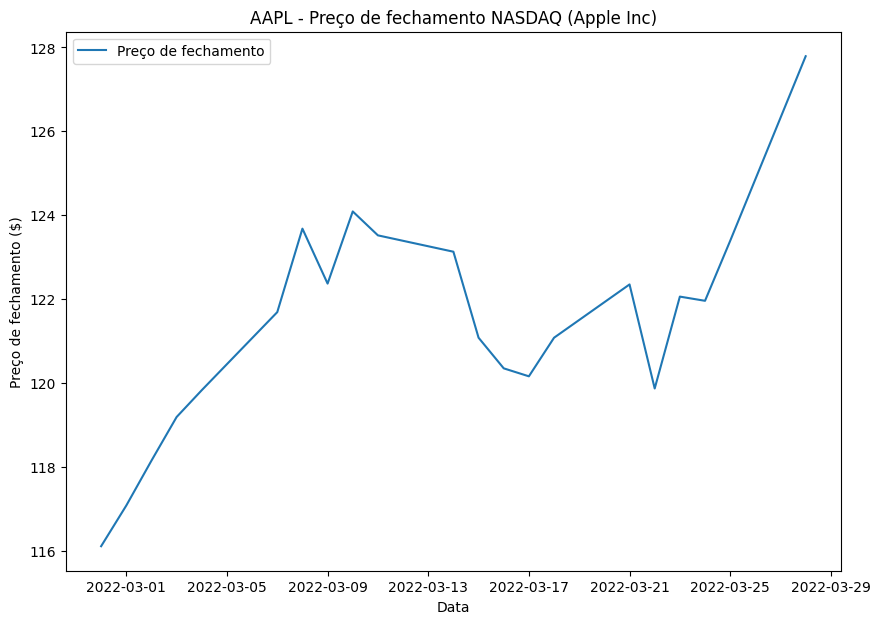

In [2]:
# Exemplo: Bibliotecas Python usadas na área financeira - matplotlib

import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/apusdigital/flisol-2023/main/datasets/AAPL.csv'

# Carrega os dados do arquivo CSV
df = pd.read_csv(url, index_col = 'Date', parse_dates = True)

# Cria um gráfico de linhas
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(df.index, df['Close'], label = 'Preço de fechamento')
ax.set_xlabel('Data')
ax.set_ylabel('Preço de fechamento ($)')
ax.set_title('AAPL - Preço de fechamento NASDAQ (Apple Inc)')
ax.legend()

# Mostra o gráfico
plt.show()

In [3]:
# Exemplo: Bibliotecas Python usadas na área financeira - yfinance

import yfinance as yf

# Obter dados da ação AAPL
stock = yf.Ticker('AAPL')

# Obter informações gerais sobre a ação
info = stock.info

# Imprimir informações sobre a ação
print(info['symbol'])
print(info['language'])
print(info['currency'])
print('\n')

# Obter o histórico de dividendos
dividendos = stock.dividends

# Imprimir o histórico de dividendos
print(dividendos)

AAPL
en-US
USD


Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2022-02-04 00:00:00-05:00    0.220000
2022-05-06 00:00:00-04:00    0.230000
2022-08-05 00:00:00-04:00    0.230000
2022-11-04 00:00:00-04:00    0.230000
2023-02-10 00:00:00-05:00    0.230000
Name: Dividends, Length: 78, dtype: float64


In [4]:
# Exemplo: Coleta de dados - yfinance

import yfinance as yf
import pandas as pd

# Lista de ações a serem analisadas
tickers = ['AAPL', 'MSFT', 'AMZN']

# Data de início e fim da coleta de dados
start_date = '2020-01-01'
end_date = '2022-03-29'

# Coleta de dados
data = yf.download(tickers, start = start_date, end = end_date)['Close']

# Renomear colunas com os nomes das ações
data.columns = tickers

# Visualização dos dados coletados
print(data.head())

[*********************100%***********************]  3 of 3 completed
                 AAPL       MSFT        AMZN
Date                                        
2020-01-02  75.087502  94.900497  160.619995
2020-01-03  74.357498  93.748497  158.619995
2020-01-06  74.949997  95.143997  159.029999
2020-01-07  74.597504  95.343002  157.580002
2020-01-08  75.797501  94.598503  160.089996


## Coleta de dados de websites

In [5]:
# Exemplo: Coleta de dados - BeautifulSoup

import requests
from bs4 import BeautifulSoup

# Define a URL do site de onde queremos extrair os dados
url = 'https://finance.yahoo.com/quote/AAPL?p=AAPL'

# Faz a requisição HTTP para a URL e obtém o conteúdo da página
response = requests.get(url)
html_content = response.content

# Cria um objeto BeautifulSoup com o conteúdo da página
soup = BeautifulSoup(html_content, 'html.parser')

# Extrai o preço atual da ação da Apple (AAPL) e exibe na tela
price_element = soup.find('fin-streamer', {'class': 'Fw(b) Fz(36px) Mb(-4px) D(ib)'})

# Imprime o elemento completo
print(price_element)

# Imprime somente o preco atual da ação
price = price_element.text
print('Preço da ação da Apple (AAPL):', price)

<fin-streamer active="" class="Fw(b) Fz(36px) Mb(-4px) D(ib)" data-field="regularMarketPrice" data-pricehint="2" data-symbol="AAPL" data-test="qsp-price" data-trend="none" value="161.8">161.80</fin-streamer>
Preço da ação da Apple (AAPL): 161.80


## Visualização de dados interativa   

In [6]:
# Exemplo: Visualização de dados - plotly

import yfinance as yf
import plotly.graph_objs as go

# Define as ações que queremos visualizar
tickers = ['AAPL', 'GOOG', 'MSFT']

# Define o intervalo de datas para o qual queremos obter os dados
start_date = '2020-01-01'
end_date = '2021-12-31'

# Obtém os dados das ações utilizando o yfinance
data = yf.download(tickers, start = start_date, end = end_date)['Adj Close']

# Cria um gráfico interativo com o plotly
fig = go.Figure()

for ticker in tickers:
    fig.add_trace(go.Scatter(x = data.index, y = data[ticker], name = ticker, line = dict(width = 2),))

fig.update_layout(
    title='Preços das ações',
    xaxis_title='Data',
    yaxis_title='Preço (USD)',
    xaxis_rangeslider_visible=True,
    height=600,
)

fig.show()

[*********************100%***********************]  3 of 3 completed


## Modelagem financeira  

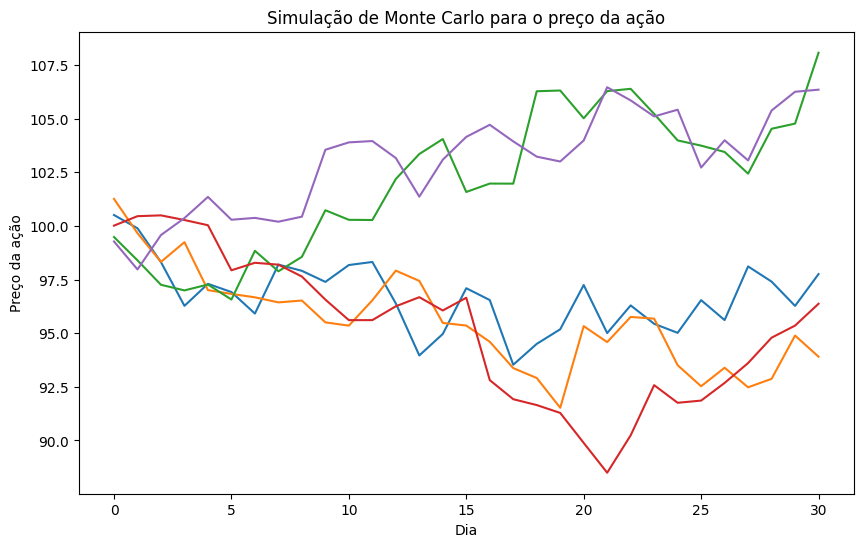

In [7]:
# Exemplo: Modelagem financeira com simulações de Monte Carlo - matplotlib

import numpy as np
import matplotlib.pyplot as plt

# Define os parâmetros da simulação
S = 100  # Preço inicial da ação
mu = 0.1  # Retorno médio diário
sigma = 0.2  # Volatilidade diária
dt = 1/252  # Intervalo de tempo (um dia)

# Define o número de simulações e o número de dias a serem simulados
num_simulacoes = 5
num_dias = 31

# Gera uma matriz com números aleatórios normalmente distribuídos
# (correspondentes aos retornos diários da ação)
r = np.random.normal((mu*dt), (sigma*np.sqrt(dt)), (num_dias, num_simulacoes))

# Calcula o preço da ação para cada simulação e cada dia
preco = S * np.exp(np.cumsum(r, axis = 0))

# Plota o gráfico das simulações de Monte Carlo
plt.figure(figsize = (10, 6))
plt.plot(preco)
plt.xlabel('Dia')
plt.ylabel('Preço da ação')
plt.title('Simulação de Monte Carlo para o preço da ação')
plt.show()

## Recursos do Google Colab

In [8]:
# Exemplo: Código Python para finanças – Recursos do Google Colab
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10125644190524015478
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14343274496
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12893646432810873698
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [9]:
!cat /proc/meminfo

MemTotal:       13297192 kB
MemFree:         7692456 kB
MemAvailable:   11357240 kB
Buffers:          330788 kB
Cached:          3516716 kB
SwapCached:            0 kB
Active:           616252 kB
Inactive:        4588728 kB
Active(anon):       1064 kB
Inactive(anon):  1358656 kB
Active(file):     615188 kB
Inactive(file):  3230072 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:             14088 kB
Writeback:             0 kB
AnonPages:       1357444 kB
Mapped:           734688 kB
Shmem:             11612 kB
KReclaimable:     121948 kB
Slab:             162904 kB
SReclaimable:     121948 kB
SUnreclaim:        40956 kB
KernelStack:        4672 kB
PageTables:        10956 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6648596 kB
Committed_AS:    3819524 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       77088 kB
VmallocChunk:          0 kB
Percpu:          

## Estudo de caso

In [10]:
# Exemplo: Código Python para finanças – Estudo de caso

# importação das bibliotecas necessárias
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr # pandas data reader
import yfinance as yf
yf.pdr_override() # fix TypeError: string indices must be integers
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # gráficos interativos

In [11]:
# BASE DE DADOS COM UMA AÇÃO - preço das ações online

# lê os dados online do yahoo finance com base no ticker da ação
nu_df = pdr.get_data_yahoo('NUBR33.SA', start = '2023-01-01', end = '2023-04-15')

# exibe o dataframe pesquisado 
# valores: abertura, maior, menor, fechamento, fechamento ajustado, volume de negociação)
print(nu_df)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,3.51,3.53,3.39,3.39,3.39,1621898
2023-01-03,3.45,3.55,3.17,3.18,3.18,8331407
2023-01-04,3.23,3.29,3.13,3.13,3.13,2301122
2023-01-05,3.18,3.19,3.06,3.09,3.09,3799620
2023-01-06,3.09,3.16,2.97,3.05,3.05,5738630
...,...,...,...,...,...,...
2023-04-04,3.78,3.86,3.76,3.76,3.76,1639916
2023-04-05,3.80,3.81,3.66,3.68,3.68,2942221
2023-04-06,3.68,3.76,3.67,3.76,3.76,1243423


In [12]:
# informações sobre a base de dados
print(nu_df.info()) 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 69 entries, 2023-01-02 to 2023-04-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       69 non-null     float64
 1   High       69 non-null     float64
 2   Low        69 non-null     float64
 3   Close      69 non-null     float64
 4   Adj Close  69 non-null     float64
 5   Volume     69 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 3.8 KB


In [13]:
# mostra os primeiros registros
print(nu_df.head(3))

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,3.51,3.53,3.39,3.39,3.39,1621898
2023-01-03,3.45,3.55,3.17,3.18,3.18,8331407
2023-01-04,3.23,3.29,3.13,3.13,3.13,2301122


In [14]:
# mostra os últimos registros
print(nu_df.tail(3))

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-06,3.68,3.76,3.67,3.76,3.76,1243423
2023-04-10,3.71,3.80,3.68,3.73,3.73,2518775
2023-04-11,3.74,3.83,3.74,3.75,3.75,715219


In [15]:
# exibe algumas estatísticas
print(nu_df.describe())

,Open,High,Low,Close,Adj Close,Volume
count,69.000000,69.000000,69.000000,69.000000,69.000000,6.900000e+01
mean,3.784493,3.896232,3.694493,3.786522,3.786522,3.312357e+06
std,0.421972,0.435698,0.396175,0.419614,0.419614,1.996153e+06
min,3.050000,3.100000,2.970000,3.040000,3.040000,7.152190e+05
25%,3.480000,3.550000,3.390000,3.440000,3.440000,2.184755e+06
50%,3.840000,3.940000,3.740000,3.850000,3.850000,2.685621e+06
75%,4.130000,4.210000,4.010000,4.130000,4.130000,3.704978e+06
max,4.680000,4.770000,4.330000,4.620000,4.620000,1.332156e+07


In [16]:
# analisa o valor de fechamento
print(nu_df[nu_df['Close'] >= 4.20])   

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-07,4.20,4.26,4.12,4.26,4.26,3204925
2023-02-08,4.23,4.36,4.18,4.26,4.26,2326534
2023-02-09,4.33,4.40,4.17,4.22,4.22,1778509
2023-02-14,4.21,4.37,4.14,4.30,4.30,2484233
2023-02-15,4.68,4.74,4.33,4.46,4.46,13321559
2023-02-16,4.46,4.77,4.23,4.62,4.62,7911604
2023-02-17,4.53,4.53,4.22,4.23,4.23,5189003
2023-02-24,4.13,4.41,4.09,4.22,4.22,2464911
2023-02-27,4.22,4.36,4.20,4.21,4.21,1298851


In [17]:
# BASE DE DADOS COM MAIS AÇÕES - preço das ações online

# BOVA11: https://www.sunoresearch.com.br/artigos/bova11/

# seleciona as ações (o BOVA11 é usado como comparativo as demais)
acoes = ['NUBR33.SA', 'TSLA', 'AMZN', 'MGLU3.SA', 'BOVA11.SA']

# busca os dados das ações (somente o Close, ou seja o valor de fechamento da ação)
acoes_df = pd.DataFrame()
for acao in acoes:
  acoes_df[acao] = pdr.get_data_yahoo(acao, start = '2023-01-01', end = '2023-04-15')['Close']

# exibe as datas e as ações
print(acoes_df)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,NUBR33.SA,TSLA,AMZN,MGLU3.SA,BOVA11.SA
Date,,,,,
2023-01-02,3.39,NaN,NaN,2.59,102.629997
2023-01-03,3.18,108.099998,85.820000,2.54,100.480003
2023-01-04,3.13,113.639999,85.139999,2.55,101.919998
2023-01-05,3.09,110.339996,83.120003,2.66,104.269997
2023-01-06,3.05,113.059998,86.080002,2.76,105.500000
...,...,...,...,...,...
2023-04-04,3.76,192.580002,103.949997,3.22,98.510002
2023-04-05,3.68,185.520004,101.099998,3.28,97.629997
2023-04-06,3.76,185.059998,102.059998,3.37,97.589996


In [18]:
# renomeia as colunas do dataframe
acoes_df = acoes_df.rename(columns={'NUBR33.SA': 'NU', 'TSLA': 'TESLA', 'AMZN': 'AMAZON', 'MGLU3.SA': 'MAGALU', 'BOVA11.SA': 'BOVA'})

# exibe os novos valores do cabeçalho
print(acoes_df.head())     

,NU,TESLA,AMAZON,MAGALU,BOVA
Date,,,,,
2023-01-02,3.39,NaN,NaN,2.59,102.629997
2023-01-03,3.18,108.099998,85.820000,2.54,100.480003
2023-01-04,3.13,113.639999,85.139999,2.55,101.919998
2023-01-05,3.09,110.339996,83.120003,2.66,104.269997
2023-01-06,3.05,113.059998,86.080002,2.76,105.500000


In [19]:
# verifica se há valores nulos
print(acoes_df.isnull().sum())

NU        0
TESLA     2
AMAZON    2
MAGALU    0
BOVA      0
dtype: int64

In [20]:
# mostra o total de registros
print(acoes_df.shape)     

(69, 5)

In [21]:
# exclui os registros nulos
print(acoes_df.dropna(inplace = True))    

In [22]:
# retorna o nome de todas as colunas
print(acoes_df.columns[1:])   

Index(['TESLA', 'AMAZON', 'MAGALU', 'BOVA'], dtype='object')

In [23]:
# visualiza algumas estatísticas prontas
print(acoes_df.describe())     

,NU,TESLA,AMAZON,MAGALU,BOVA
count,67.000000,67.000000,67.000000,67.000000,67.000000
mean,3.803582,175.348429,97.121343,3.603433,103.100299
std,0.412662,30.471483,5.152972,0.479275,4.231127
min,3.050000,108.099998,83.120003,2.540000,94.580002
25%,3.565000,163.465004,94.075001,3.295000,99.680000
50%,3.850000,187.604706,97.610001,3.590000,103.220001
75%,4.135000,196.044998,100.400002,3.940000,106.419998
max,4.620000,214.240005,112.910004,4.530000,110.650002


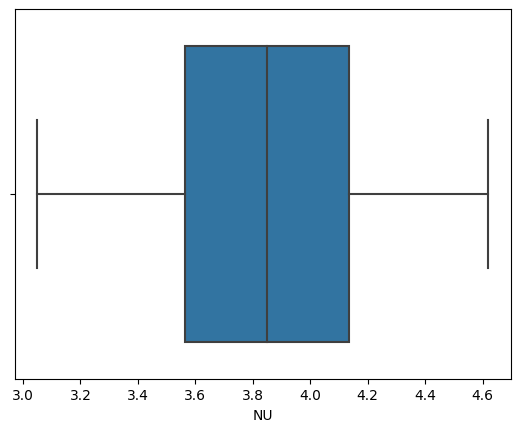

In [24]:
# BOXPLOT (valores min e máx)

# busca as ações do NUBANK
sns.boxplot(x = acoes_df['NU']); 
# os pontos a direita são os outliers
# as divisões do retângulo (mediana) são: 1º quartil e 2º quartil

In [25]:
# converte o index 'Date' do dataframe em coluna
acoes_df.reset_index(inplace = True)
print(acoes_df.head())

,Date,NU,TESLA,AMAZON,MAGALU,BOVA
0,2023-01-03,3.18,108.099998,85.820000,2.54,100.480003
1,2023-01-04,3.13,113.639999,85.139999,2.55,101.919998
2,2023-01-05,3.09,110.339996,83.120003,2.66,104.269997
3,2023-01-06,3.05,113.059998,86.080002,2.76,105.500000
4,2023-01-09,3.21,119.769997,87.360001,2.83,105.349998


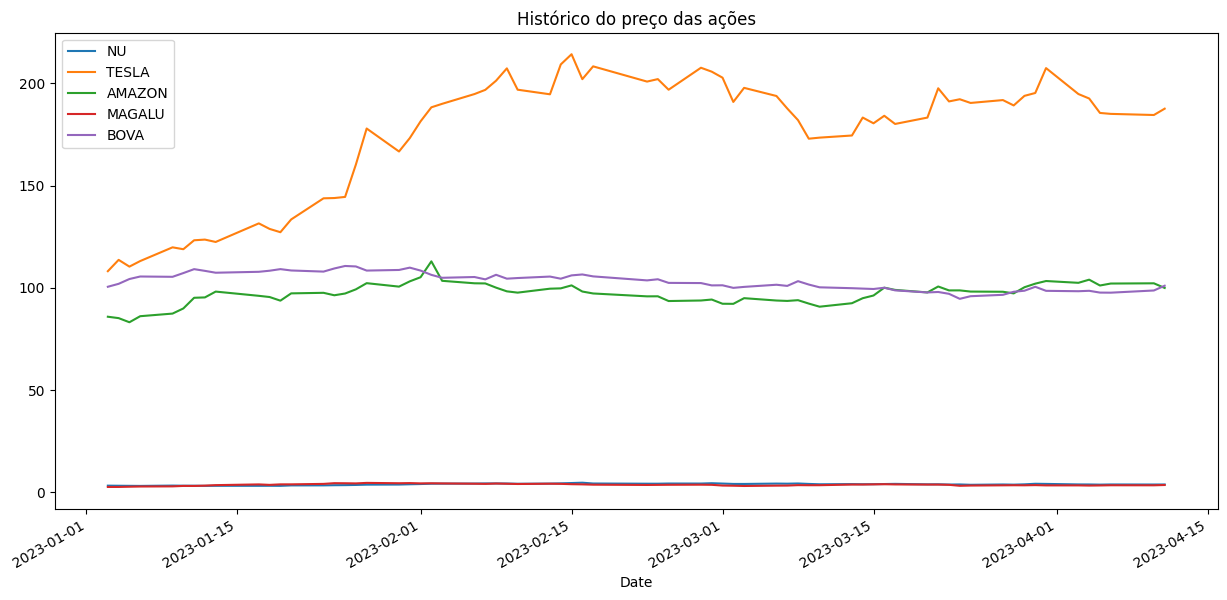

In [26]:
# GRÁFICO DE LINHAS: crescimento de cada empresa
acoes_df.plot(x = 'Date', figsize = (15,7), title = 'Histórico do preço das ações'); # valores não normalizados

In [30]:
# seleciona somente as ações do NUBANK e MAGALU 
acoes_br_df = acoes_df[['Date', 'NU', 'MAGALU']]
print(acoes_br_df.head())

,Date,NU,MAGALU
0,2023-01-03,3.18,2.54
1,2023-01-04,3.13,2.55
2,2023-01-05,3.09,2.66
3,2023-01-06,3.05,2.76
4,2023-01-09,3.21,2.83


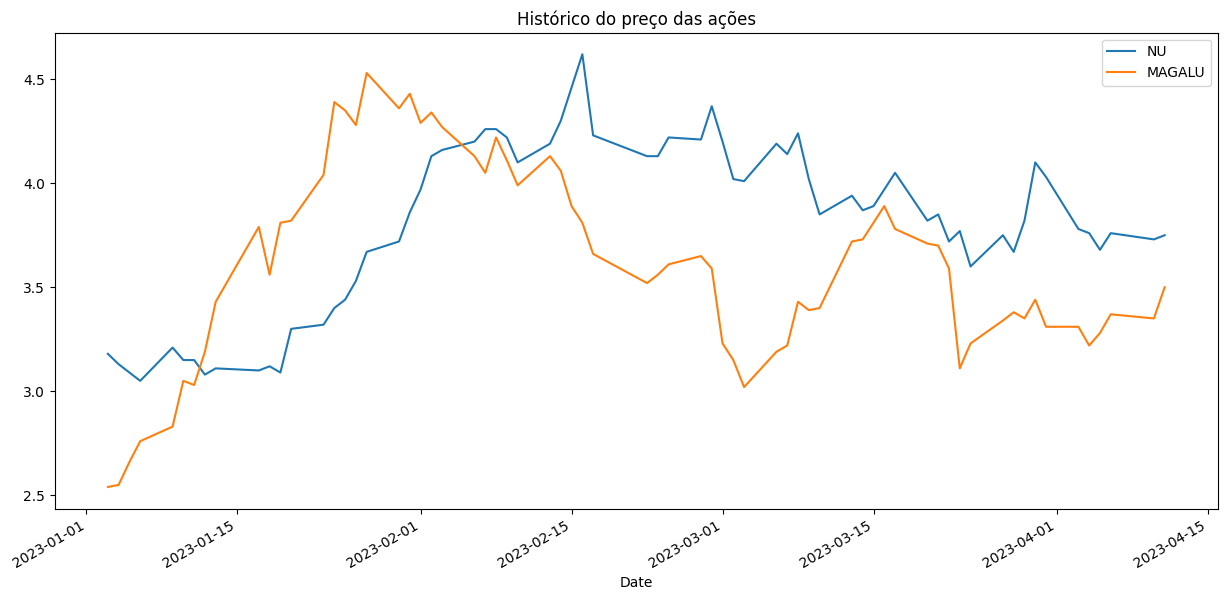

In [31]:
# gera um gráfico com as ações especificadas
acoes_br_df.plot(x = 'Date', figsize = (15,7), title = 'Histórico do preço das ações'); 

## Bônus track